In [1]:
%matplotlib inline

In [2]:
#Importing the relevant dependencies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px

In [3]:
#Importing the Models with which the data is going to be fitted
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder


#Importing the Metrics which we will be using
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, precision_score


In [4]:
#Read the dataset into a variable and create the dataframe
cm_df = pd.read_csv("Churn_Modelling.csv")
cm_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
cm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Visualizing aspects of the data to drive the Data Engineering Process

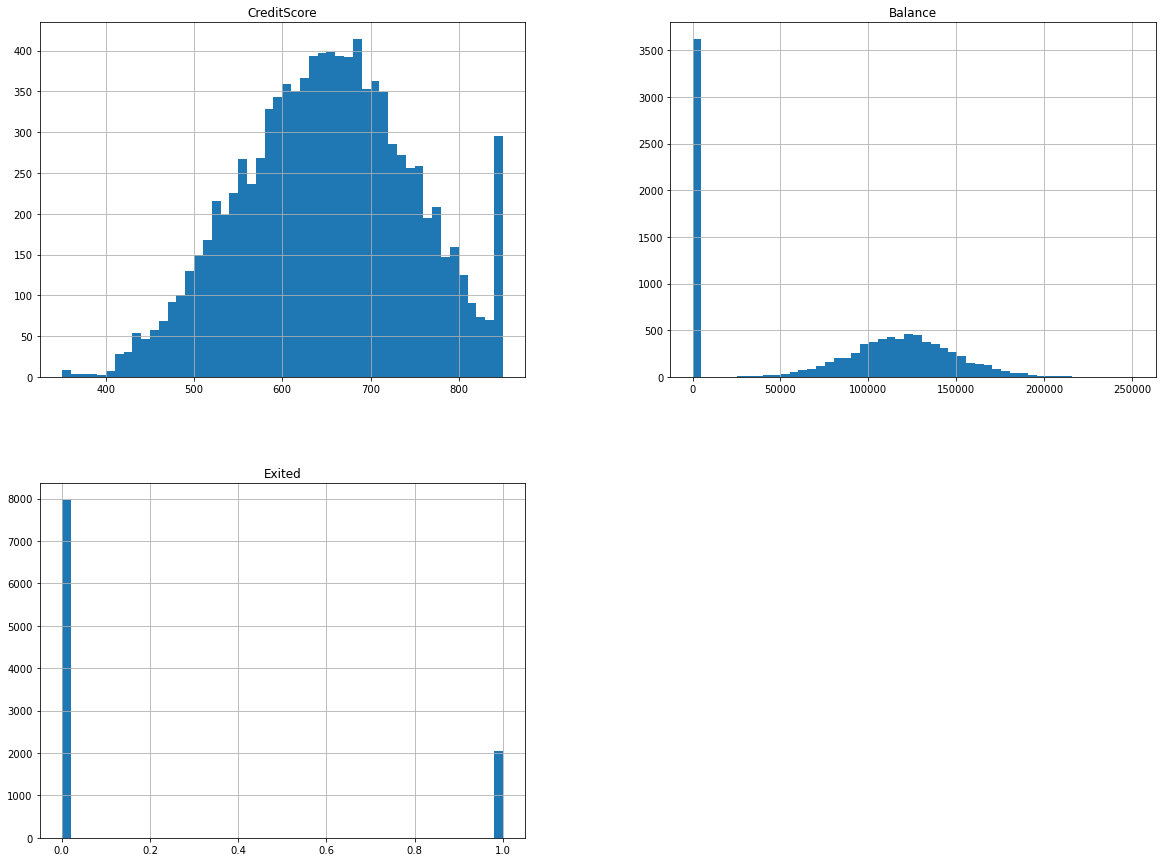

In [6]:
cm_df[["CreditScore", "Balance", "Exited"]].hist(bins=50, figsize=(20,15)) 
plt.show()

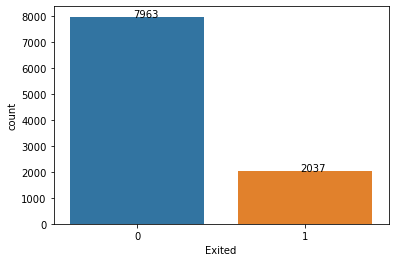

In [7]:
#Plotting the number of people who stayed and who left the company
ax = sns.countplot(x="Exited", data=cm_df)
for p, label in zip(ax.patches, cm_df["Exited"].value_counts()):
    ax.annotate(label, (p.get_x()+0.375, p.get_height()+0.95))
#plt.show()

# Fitting the data to two models to get baseline metrics

In [8]:
def oneHot(X):
    #Applying OneHotEncoding
    OHEncoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
    #getting a list of categorical columns
    c = (X.dtypes == "object")
    object_cols = list(c[c].index)

    print("Categorical Columns: ")
    print(object_cols)

    encoded_columns = pd.DataFrame(OHEncoder.fit_transform(X[object_cols]))
    encoded_columns.columns = OHEncoder.get_feature_names(object_cols)

    #putting back the indices
    encoded_columns.index = X.index

    #dropping the categorical columns
    X_train_naive = X.drop(object_cols, axis=1)
    X_encoded = pd.concat([X_train_naive, encoded_columns], axis=1)
    
    return X_encoded

In [9]:
# Create our  training and testing datasets.
X = cm_df.drop(columns = ["RowNumber", "CustomerId", "Surname", "Exited"])
y = cm_df["Exited"]

X = oneHot(X)
X.head()

Categorical Columns: 
['Geography', 'Gender']


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0,1.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0,1.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0,1.0,0.0


In [10]:
#Separating out training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print("The length of the training set is: {} ".format(len(X_train)))
print("The length of the test set is: {} ".format(len(X_test)))

The length of the training set is: 8000 
The length of the test set is: 2000 


Logistic Regression Accuracy: 80.050% 
Random Forest Classifier Accuracy: 86.450%

 
Logistic Regression Precision: 45.161% 
Random Forest Classifier Precision: 75.847%

 


<AxesSubplot:title={'center':'Random Forest Classifier'}>

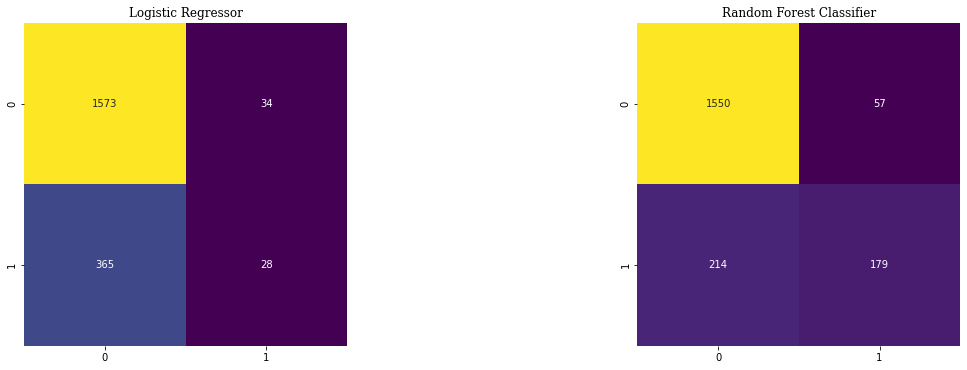

In [11]:
#defining the models which will be fitted to the data.
logistic_regressor = LogisticRegression()
random_forest = RandomForestClassifier()


logistic_regressor.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
print("Logistic Regression Accuracy: {:.3f}% ".format(logistic_regressor.score(X_test, y_test)*100))
print("Random Forest Classifier Accuracy: {:.3f}%\n\n ".format(random_forest.score(X_test, y_test)*100))

print("Logistic Regression Precision: {:.3f}% ".format(precision_score(y_test, logistic_regressor.predict(X_test))*100))
print("Random Forest Classifier Precision: {:.3f}%\n\n ".format(precision_score(y_test , random_forest.predict(X_test))*100))

#Plotting the Confusion Matrix
plt.figure(figsize=(10, 10))
plt.subplots_adjust(left = 1 , bottom = 1 , right = 2.3 , top = 2 , wspace = 0.9 , hspace = None)
small_font = {'family':'serif' , 'size':12}
plt.subplot(1,2,1)
plt.title('Logistic Regressor' , fontdict = small_font)
sns.heatmap(data = metrics.confusion_matrix(y_test , logistic_regressor.predict(X_test)) , annot = True , fmt = '.0f' , cmap = 'viridis'
            , cbar = False , square = True)

plt.subplot(1,2,2)
plt.title('Random Forest Classifier' , fontdict = small_font)
sns.heatmap(data = confusion_matrix(y_test , random_forest.predict(X_test)) , annot = True , fmt = '.0f' , cmap = 'viridis'
           , cbar = False , square = True)

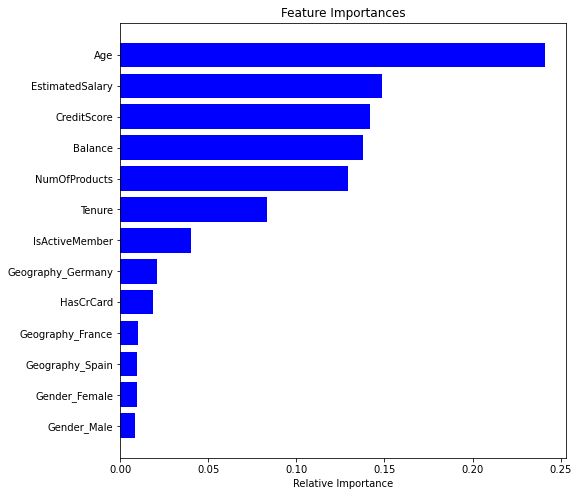

In [12]:
features = X_test.columns
importances = random_forest.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Engineering features for better accuracy
Since we have accuracies of 80% and 86.4%, these will serve as the baseline for all our other model, and we will try to improve upon this accuracy

We will perform 3 main tasks:
1. Change the balance out both classes (those who stayed and those who left)
2. Make changes to the "Balance" column by interpolating values and possibly adding another column to it.
3. Perform hyperparameter tuning on both models to improve their performances.

In [13]:
#Balancing the dataset by sampling the number of people who left. We make sure we have an equal number of observations from both samples.
emps_who_left = cm_df[cm_df["Exited"]==1]
no_emps_who_left= len(emps_who_left)

emps_who_stayed = cm_df[cm_df["Exited"]==0].sample(n=no_emps_who_left)

balanced_df = pd.concat([emps_who_left, emps_who_stayed])

#shuffling the dataset
balanced_df = balanced_df.sample(frac=1).reset_index(drop=True)
balanced_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,5256,15745533,Sargent,799,France,Female,63,1,110314.21,2,1,0,37464.00,1
1,1369,15745843,Kinlaw,689,Spain,Female,31,4,0.00,2,1,1,136610.02,0
2,896,15697000,Mello,728,Germany,Male,32,5,61825.50,1,1,1,156124.93,0
3,4769,15698528,Napolitani,599,Spain,Female,31,3,0.00,1,1,1,130086.47,1
4,4946,15646784,Cochran,529,France,Female,31,2,164003.05,2,1,1,60993.23,0


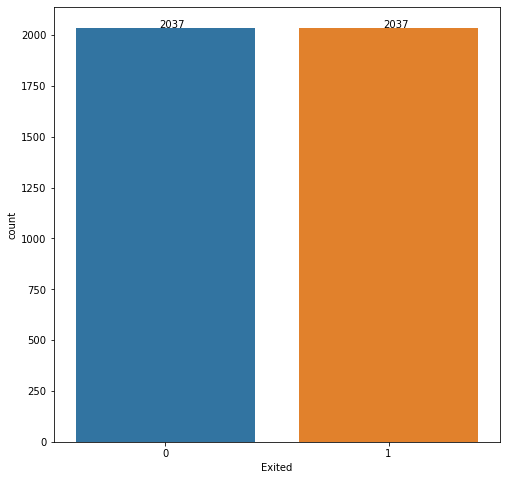

In [14]:
#Visualising both classes
plt.figure(figsize=(8, 8))
ax = sns.countplot(x="Exited", data=balanced_df)
for p, label in zip(ax.patches, balanced_df["Exited"].value_counts()):
    ax.annotate(label, (p.get_x()+0.375, p.get_height()+0.15))

In [15]:
# Defining our dependent and independent variables
X = balanced_df.drop(columns = ["RowNumber", "CustomerId", "Surname", "Exited"])
y = balanced_df["Exited"]

X = oneHot(X)

X.head()

Categorical Columns: 
['Geography', 'Gender']


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,799,63,1,110314.21,2,1,0,37464.00,1.0,0.0,0.0,1.0,0.0
1,689,31,4,0.00,2,1,1,136610.02,0.0,0.0,1.0,1.0,0.0
2,728,32,5,61825.50,1,1,1,156124.93,0.0,1.0,0.0,0.0,1.0
3,599,31,3,0.00,1,1,1,130086.47,0.0,0.0,1.0,1.0,0.0
4,529,31,2,164003.05,2,1,1,60993.23,1.0,0.0,0.0,1.0,0.0


The length of the training set is: 3259 
The length of the test set is: 815 


Logistic Regression Accuracy: 63.804% 
Random Forest Classifier Accuracy: 75.215% 

 
Logistic Regression Precision: 67.352% 
Random Forest Classifier Precision: 80.481%

 


<AxesSubplot:title={'center':'Random Forest Classifier'}>

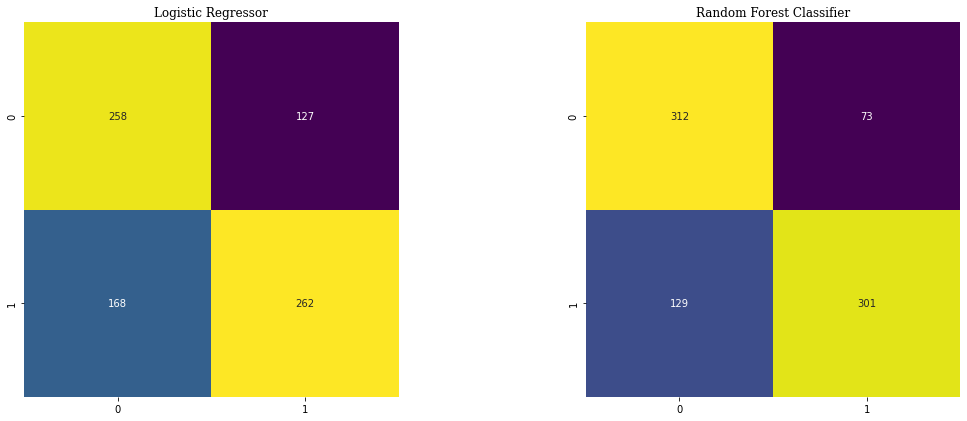

In [16]:
#Separating out training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

print("The length of the training set is: {} ".format(len(X_train)))
print("The length of the test set is: {} \n\n".format(len(X_test)))

#defining the models which will be fitted to the data.
logistic_regressor = LogisticRegression()
random_forest = RandomForestClassifier()

#defining and fitting the models
logistic_regressor.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
print("Logistic Regression Accuracy: {:.3f}% ".format(logistic_regressor.score(X_test, y_test)*100))
print("Random Forest Classifier Accuracy: {:.3f}% \n\n ".format(random_forest.score(X_test, y_test)*100))

print("Logistic Regression Precision: {:.3f}% ".format(precision_score(y_test, logistic_regressor.predict(X_test))*100))
print("Random Forest Classifier Precision: {:.3f}%\n\n ".format(precision_score(y_test , random_forest.predict(X_test))*100))

#Plotting the Confusion Matrix
plt.figure(figsize=(10, 10))
plt.subplots_adjust(left = 1 , bottom = 1 , right = 2.3 , top = 2 , wspace = 0.5 , hspace = None)
small_font = {'family':'serif' , 'size':12}
plt.subplot(1,2,1)
plt.title('Logistic Regressor' , fontdict = small_font)
sns.heatmap(data = metrics.confusion_matrix(y_test , logistic_regressor.predict(X_test)) , annot = True , fmt = '.0f' , cmap = 'viridis'
            , cbar = False , square = True)

plt.subplot(1,2,2)
plt.title('Random Forest Classifier' , fontdict = small_font)
sns.heatmap(data = confusion_matrix(y_test , random_forest.predict(X_test)) , annot = True , fmt = '.0f' , cmap = 'viridis'
           , cbar = False , square = True)

#  Making changes to the "Balance" column

In [17]:
mean_balance = cm_df[cm_df["Balance"] > 0]["Balance"].mean()

def replaceval(y, mean_balance):
    if y == 0:
        y = mean_balance
    return y


In [18]:
# Defining our dependent and independent variables
# X = cm_df.drop(columns = ["RowNumber", "CustomerId", "Surname", "Stayed"])
# y = cm_df["Stayed"]

# X = oneHot(X)

new_cols = X["Balance"].map(lambda x: replaceval(x, mean_balance))

X.drop(columns="Balance", inplace=True)
X["Balance"] = new_cols
X.head()

,CreditScore,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Balance
0,799,63,1,2,1,0,37464.00,1.0,0.0,0.0,1.0,0.0,110314.210000
1,689,31,4,2,1,1,136610.02,0.0,0.0,1.0,1.0,0.0,119827.493793
2,728,32,5,1,1,1,156124.93,0.0,1.0,0.0,0.0,1.0,61825.500000
3,599,31,3,1,1,1,130086.47,0.0,0.0,1.0,1.0,0.0,119827.493793
4,529,31,2,2,1,1,60993.23,1.0,0.0,0.0,1.0,0.0,164003.050000


The length of the training set is: 3259 

The length of the test set is: 815 

Logistic Regression Accuracy: 65.39877300613497% 
Random Forest Classifier Accuracy: 75.21472392638037% 
Logistic Regression Precision: 68.878% 

Random Forest Classifier Precision: 79.688%

 


<AxesSubplot:title={'center':'Random Forest Classifier'}>

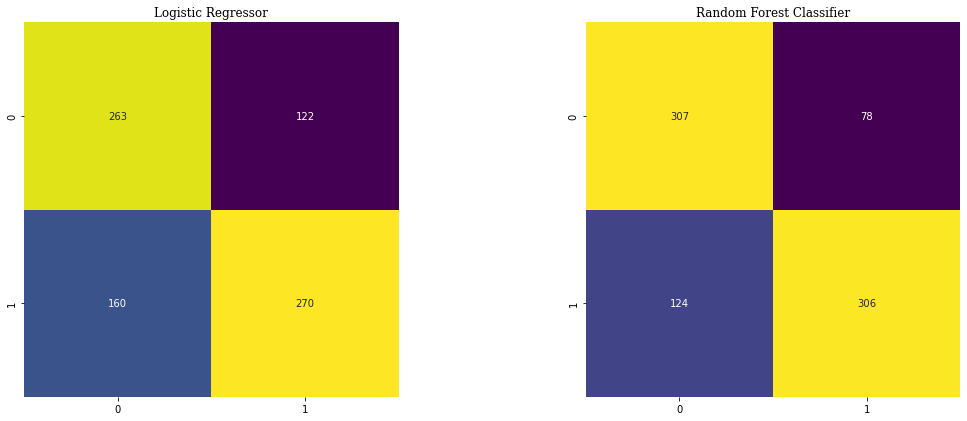

In [19]:
#Separating out training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

print("The length of the training set is: {} \n".format(len(X_train)))
print("The length of the test set is: {} \n".format(len(X_test)))

#defining the models which will be fitted to the data.
logistic_regressor = LogisticRegression()
random_forest = RandomForestClassifier()

#defining and fitting the models
logistic_regressor.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
print("Logistic Regression Accuracy: {}% ".format(logistic_regressor.score(X_test, y_test)*100))
print("Random Forest Classifier Accuracy: {}%\n ".format(random_forest.score(X_test, y_test)*100))

print("Logistic Regression Precision: {:.3f}% \n".format(precision_score(y_test, logistic_regressor.predict(X_test))*100))
print("Random Forest Classifier Precision: {:.3f}%\n\n ".format(precision_score(y_test , random_forest.predict(X_test))*100))


#Plotting the Confusion Matrix
plt.figure(figsize=(10, 10))
plt.subplots_adjust(left = 1 , bottom = 1 , right = 2.3 , top = 2 , wspace = 0.5 , hspace = None)
small_font = {'family':'serif' , 'size':12}
plt.subplot(1,2,1)
plt.title('Logistic Regressor' , fontdict = small_font)
sns.heatmap(data = metrics.confusion_matrix(y_test , logistic_regressor.predict(X_test)) , annot = True , fmt = '.0f' , cmap = 'viridis'
            , cbar = False , square = True)

plt.subplot(1,2,2)
plt.title('Random Forest Classifier' , fontdict = small_font)
sns.heatmap(data = confusion_matrix(y_test , random_forest.predict(X_test)) , annot = True , fmt = '.0f' , cmap = 'viridis'
           , cbar = False , square = True)

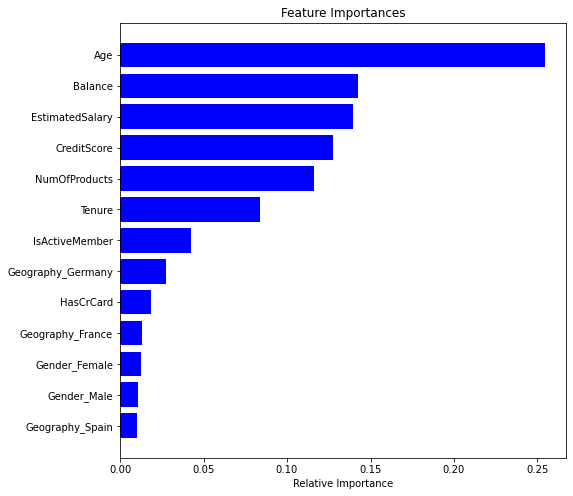

In [20]:
features = X_test.columns
importances = random_forest.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# HyperParameter Tuning

In [21]:
#CCreating a dictionary 
from sklearn.model_selection import GridSearchCV
forest = RandomForestClassifier()
n_estimators = [100, 200, 300, 400, 500]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, scoring="precision", cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


In [22]:
print("The highest precision was {:.3f}% and we achieved it with the following parameters: {}".format(bestF.best_score_*100, bestF.best_params_))

The highest precision was 79.896% and we achieved it with the following parameters: {'max_depth': 25, 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 300}


Random Forest Classifier Accuracy: 75.828% 

Random Forest Classifier Precision: 80.418%

 


Text(0.5, 1.0, 'Random Forest Classifier')

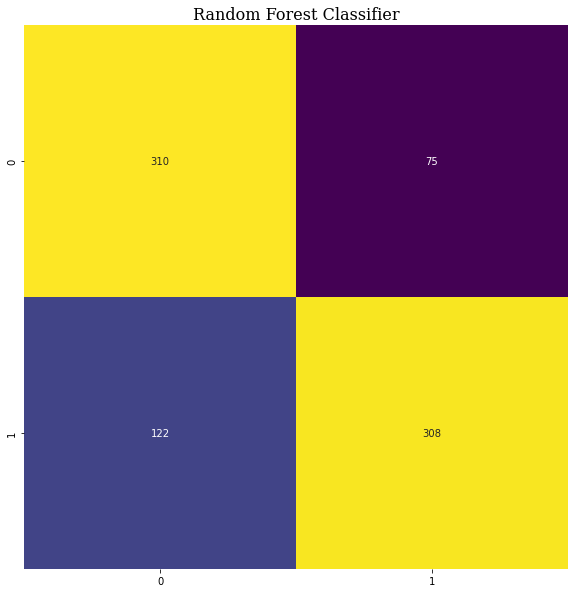

In [23]:
random_forest = RandomForestClassifier(n_estimators=200,max_depth=30, min_samples_leaf=2, min_samples_split=15)

#defining and fitting the models
random_forest.fit(X_train, y_train)
print("Random Forest Classifier Accuracy: {:.3f}% \n".format(random_forest.score(X_test, y_test)*100))

print("Random Forest Classifier Precision: {:.3f}%\n\n ".format(precision_score(y_test , random_forest.predict(X_test))*100))


#Plotting the Confusion Matrix
plt.figure(figsize=(10, 10))
small_font = {'family':'serif' , 'size':16}
sns.heatmap(data = confusion_matrix(y_test , random_forest.predict(X_test)) , annot = True , fmt = '.0f' , cmap = 'viridis'
           , cbar = False , square = True)
plt.title('Random Forest Classifier' , fontdict = small_font)


In [24]:
X = cm_df.drop(columns = ["RowNumber", "CustomerId", "Surname", "Exited"])
y = cm_df["Exited"]

X = oneHot(X)

#Separating out training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)



new_forest = RandomForestClassifier()
n_estimators = [100, 200, 300, 400, 500]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(new_forest, hyperF, scoring= "precision", cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

print("The highest accuracy was {:.3f}% and we achieved it with the following parameters: {}".format(bestF.best_score_*100, bestF.best_params_))

Categorical Columns: 
['Geography', 'Gender']
Fitting 3 folds for each of 500 candidates, totalling 1500 fits
The highest accuracy was 89.037% and we achieved it with the following parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


Random Forest Classifier Accuracy: 84.6% 
Random Forest Classifier Precision: 84.553%

 


Text(0.5, 1.0, 'Random Forest Classifier')

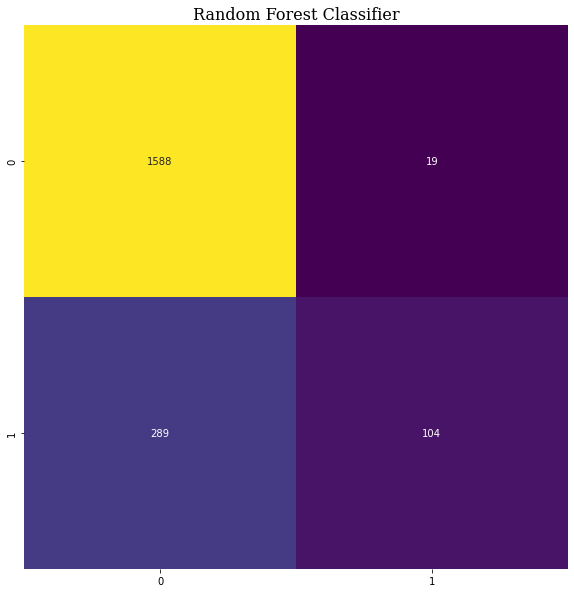

In [25]:
random_forest = RandomForestClassifier(n_estimators=200,max_depth=5, min_samples_leaf=5, min_samples_split=10)

#defining and fitting the models
random_forest.fit(X_train, y_train)
print("Random Forest Classifier Accuracy: {}% ".format(random_forest.score(X_test, y_test)*100))


print("Random Forest Classifier Precision: {:.3f}%\n\n ".format(precision_score(y_test , random_forest.predict(X_test))*100))


#Plotting the Confusion Matrix
plt.figure(figsize=(10, 10))
small_font = {'family':'serif' , 'size':16}
sns.heatmap(data = confusion_matrix(y_test , random_forest.predict(X_test)) , annot = True , fmt = '.0f' , cmap = 'viridis'
           , cbar = False , square = True)
plt.title('Random Forest Classifier' , fontdict = small_font)

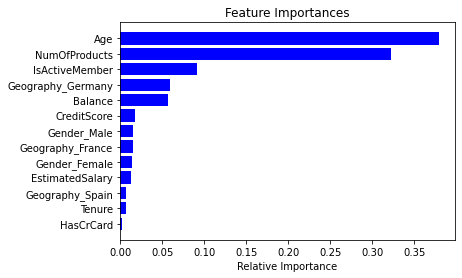

In [26]:
features = X_test.columns
importances = random_forest.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Conclusion
Hyper parameter tunning had minimal impact on the accuracy of our model.  The best accuracy was achieved using the original data, after encoding and removal of features that had minimmal impact on the accuracy of our model.  We determined that the Random Forest classifier model was the better of the two models.  It  yielded the highest accuracy (86.45%) as it responded better to changes made during our data engineering process. 